In [1]:
import pygsti
import pygsti.algorithms.randomcircuit as rc
#note: you need qsearch to run this

In [2]:
num_qubits = 2
qubit_labels = tuple((f'Q{i}' for i in range(num_qubits))) #Usually I use this convention for qubit labels. The default is natural numbers 0, ..., n-1
gates = ['Gxpi2', 'Gzr', 'Gcphase'] #list of all of the gates
availability = {'Gcphase': [('Q0', 'Q1'),('Q1', 'Q0')]} #specify connectivity as a dictionary with gate names and a list of connected qubit pairs

In [3]:
c = pygsti.circuits.Circuit(None, stringrep='')

In [4]:
model = pygsti.models.create_crosstalk_free_model(ps, evotype='statevec', simulator='matrix')

NameError: name 'ps' is not defined

In [18]:
? model.circuit_layer_operator

In [21]:
? pygsti.forwardsims.MatrixForwardSimulator

In [15]:
? pygsti.forwardsims.MatrixForwardSimulator

In [ ]:
ps = pygsti.processors.processorspec.QubitProcessorSpec(num_qubits, gates, qubit_labels=qubit_labels, availability=availability)

In [ ]:
#create a depth 1 DRB circuit
rc.create_udrb_circuit(ps, 2, layer_type='standard')

In [6]:
%debug #why is there an empty layer

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> u
> /home/jordanh/.pyenv/versions/3.8.0/lib/python3.8/bdb.py(587)run()
    585         sys.settrace(self.trace_dispatch)
    586         try:
--> 587             exec(cmd, globals, locals)
    588         except BdbQuit:
    589             pass

ipdb> u
*** Oldest frame
ipdb> q


In [6]:
#create a DRB edesign
ds = [2**i for i in range(8)]
edesign = pygsti.protocols.create_udrb_edesign(ps, ds, 5, layer_type='cz=zxzxz', qubit_labels=None, twoQ_gate_density=1/2)

TypeError: create_udrb_edesign() got an unexpected keyword argument 'layer_type'

In [56]:
model = pygsti.models.create_crosstalk_free_model(ps)

In [61]:
data = pygsti.data.simulate_data(model, edesign.all_circuits_needing_data, 1000)

/home/jordanh/pyGSTi/pygsti/layouts/evaltree.py:183: UserWarning: Created an evaluation tree that is inefficient: tree-size > 100 * #circuits !
This is likely due to the fact that the circuits being simulated do not have a
periodic structure. Consider using a different forward simulator (e.g. MapForwardSimulator).
  _warnings.warn(("Created an evaluation tree that is inefficient: tree-size > %d * #circuits !\n"


In [62]:
pd = pygsti.protocols.ProtocolData(edesign, data)

In [63]:
rb = pygsti.protocols.RandomizedBenchmarking()

In [64]:
result = rb.run(data=pd)

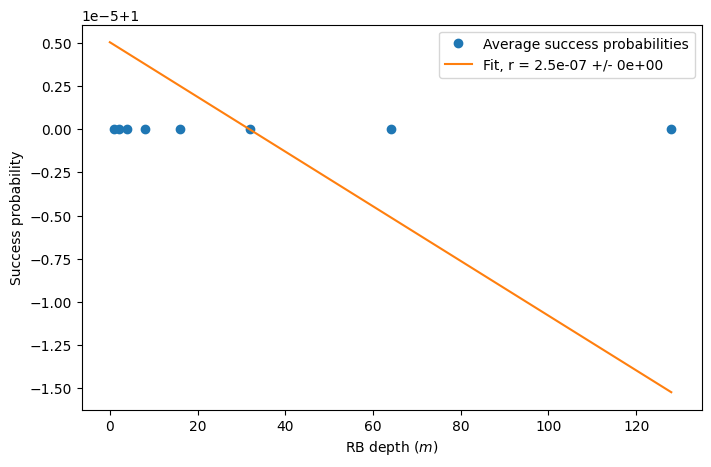

In [65]:
result.plot()